In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
miss_val=["NaN","n/a","na","N/A","NA","Na","nan","?"]

In [3]:
df=pd.read_csv(r"C:\Users\SMART\Downloads\train_loan (1).csv",na_values=miss_val)

In [4]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Preprocessing

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.shape

(614, 13)

In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.Loan_ID.nunique()

614

In [10]:
df1=df.drop(['Loan_ID'],axis=1)

In [11]:
df1["Gender"]=df1["Gender"].fillna("Male")
df1["Married"]=df1["Married"].fillna("Yes")
df1["Self_Employed"]=df1["Self_Employed"].fillna("No")
df1["Dependents"]=df1["Dependents"].fillna("0")

In [12]:
df1["Loan_Amount_Term"].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [13]:
df1["LoanAmount"]=df1["LoanAmount"].fillna(df1["LoanAmount"].median())
df1["Credit_History"]=df1["Credit_History"].fillna(df1["Credit_History"].median())
df1['Loan_Amount_Term']=df1['Loan_Amount_Term'].fillna(360.0)

In [14]:
df1.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df1["Dependents"].unique()

array(['0', '1', '2', '3+'], dtype=object)

In [16]:
df1["Dependents"]=df1["Dependents"].map({'0':0,'1':1,'2':2,'3+':3})

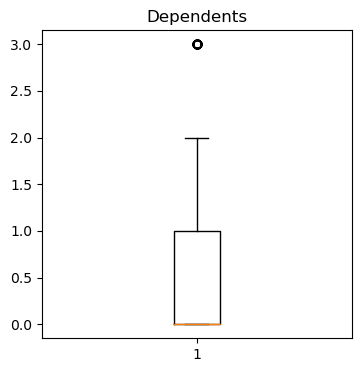

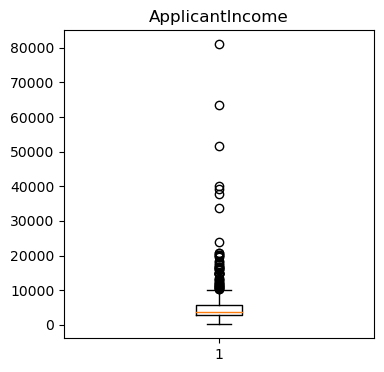

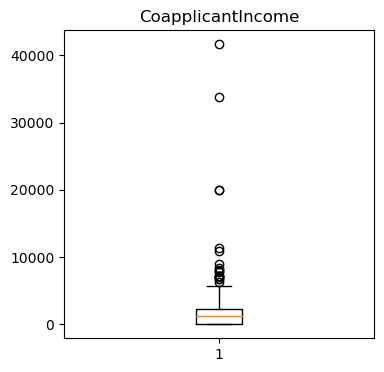

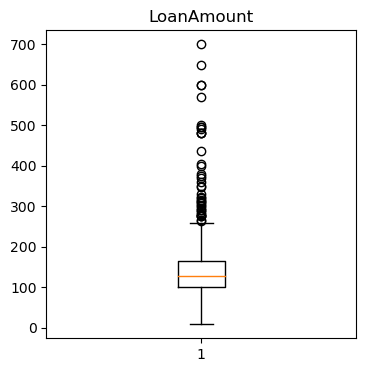

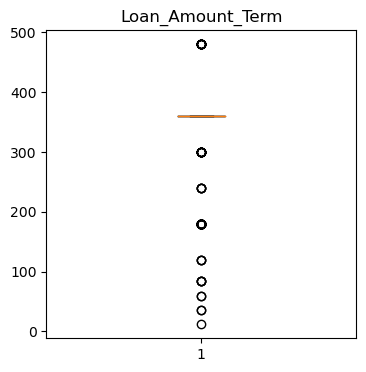

In [17]:
for col in ["Dependents",'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']:
    plt.figure(figsize=(4,4))
    plt.boxplot(df1[col])
    plt.title(col)
    plt.show()

In [18]:
def limits(data,col):
    Q1=data[col].quantile(.25)
    Q3=data[col].quantile(.75)
    IQR=Q3-Q1
    low_bound=Q1-IQR*1.5
    up_bound=Q3+IQR*1.5
    return low_bound,up_bound

In [19]:
low_ApplicantIncome,up_ApplicantIncome=limits(df1,"ApplicantIncome")
print(low_ApplicantIncome,up_ApplicantIncome)
print(df1.ApplicantIncome.min(),df1.ApplicantIncome.max())
filtered_rows_in = df1[(df1["ApplicantIncome"] < low_ApplicantIncome) | (df1["ApplicantIncome"] > up_ApplicantIncome)]

-1498.75 10171.25
150 81000


In [20]:
for x in df1["ApplicantIncome"]:
    if x < low_ApplicantIncome:
        df1["ApplicantIncome"].replace(x,low_ApplicantIncome,inplace=True)
    if x > up_ApplicantIncome:
        df1["ApplicantIncome"].replace(x,up_ApplicantIncome,inplace=True)

In [21]:
print(df1.ApplicantIncome.min(),df1.ApplicantIncome.max())

150.0 10171.25


In [22]:
low_CoapplicantIncome,up_CoapplicantIncome=limits(df1,"CoapplicantIncome")
print(low_CoapplicantIncome,up_CoapplicantIncome)
print(df1.CoapplicantIncome.min(),df1.CoapplicantIncome.max())
filtered_rows_coin = df1[(df1["CoapplicantIncome"] < low_CoapplicantIncome) | (df1["CoapplicantIncome"] > up_CoapplicantIncome)]

-3445.875 5743.125
0.0 41667.0


In [23]:
for x in df1["CoapplicantIncome"]:
    if x < low_CoapplicantIncome:
        df1["CoapplicantIncome"].replace(x,low_CoapplicantIncome,inplace=True)
    if x > up_CoapplicantIncome:
        df1["CoapplicantIncome"].replace(x,up_CoapplicantIncome,inplace=True)

In [24]:
print(df1.CoapplicantIncome.min(),df1.CoapplicantIncome.max())

0.0 5743.125


In [25]:
low_LoanAmount,up_LoanAmount=limits(df1,"LoanAmount")
print(low_LoanAmount,up_LoanAmount)
print(df1.LoanAmount.min(),df1.LoanAmount.max())
filtered_rows_la = df1[(df1["LoanAmount"] < low_LoanAmount) | (df1["LoanAmount"] > up_LoanAmount)]

3.5 261.5
9.0 700.0


In [26]:
filtered_rows_la.shape

(41, 12)

In [27]:
for x in df1["LoanAmount"]:
    if x < low_LoanAmount:
        df1["LoanAmount"].replace(x,low_LoanAmount,inplace=True)
    if x > up_LoanAmount:
        df1["LoanAmount"].replace(x,up_LoanAmount,inplace=True)

In [28]:
print(df1.LoanAmount.min(),df1.LoanAmount.max())

9.0 261.5


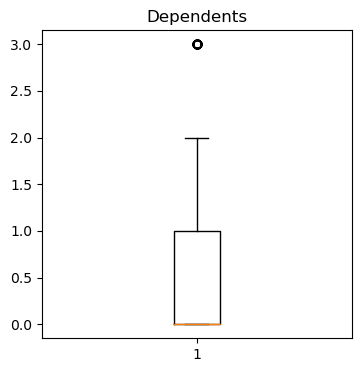

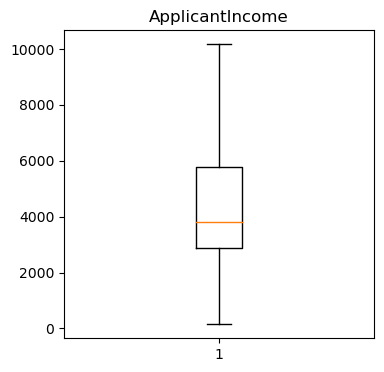

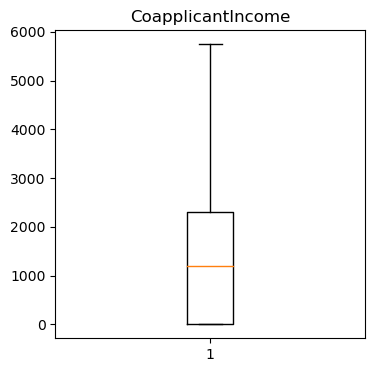

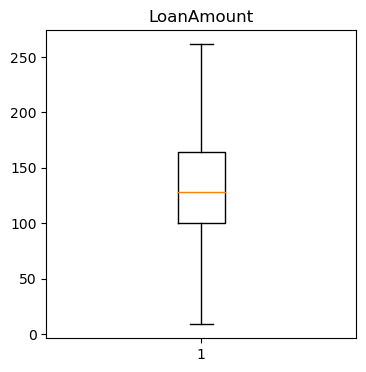

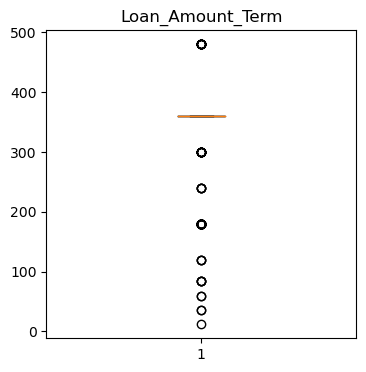

In [29]:
for col in ["Dependents",'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term']:
    plt.figure(figsize=(4,4))
    plt.boxplot(df1[col])
    plt.title(col)
    plt.show()

In [30]:
df1=pd.get_dummies(df1,columns=['Gender','Married','Education','Self_Employed','Property_Area'])

In [31]:
df1["Loan_Status"]=df1["Loan_Status"].map({'Y':1,'N':0})

In [32]:
df1.head(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,5849.0,0.0,128.0,360.0,1.0,1,0,1,1,0,1,0,1,0,0,0,1
1,1,4583.0,1508.0,128.0,360.0,1.0,0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000.0,0.0,66.0,360.0,1.0,1,0,1,0,1,1,0,0,1,0,0,1


## Training the Models

In [33]:
X=df1.drop(['Loan_Status'],axis=1)
y=df1['Loan_Status']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

### Ensemble- Bagging

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [36]:
tree= DecisionTreeClassifier()

In [37]:
from sklearn.ensemble import BaggingClassifier

In [38]:
bagging_clf_tree = BaggingClassifier(base_estimator = tree, n_estimators = 100, random_state = 42)

In [39]:
bagging_clf_tree.fit(X_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [40]:
y_pred_bgtree=bagging_clf_tree.predict(X_test)

In [41]:
accuracy_score(y_test,y_pred_bgtree)

0.7560975609756098

In [42]:
svc=SVC()

In [43]:
bagging_clf_svc = BaggingClassifier(base_estimator =svc, n_estimators = 100, random_state = 42)

In [44]:
bagging_clf_svc.fit(X_train,y_train)

BaggingClassifier(base_estimator=SVC(), n_estimators=100, random_state=42)

In [45]:
y_pred_bgsvc=bagging_clf_svc.predict(X_test)
accuracy_score(y_test,y_pred_bgsvc)

0.6829268292682927

In [46]:
RFclf=RandomForestClassifier()

In [47]:
RFclf.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
y_pred_rf=RFclf.predict(X_test)
accuracy_score(y_test,y_pred_rf)

0.7479674796747967

### Boosting

In [49]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [50]:
ada_clf = AdaBoostClassifier(n_estimators=100)
ada_clf.fit(X_train,y_train)
y_pred_ada = ada_clf.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred_ada)

0.7479674796747967

In [52]:
grad_clf=GradientBoostingClassifier()

In [53]:
grad_clf.fit(X_train,y_train)
y_pred_gb = grad_clf.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred_gb)

0.7317073170731707

In [55]:
xgb=xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
y_pred_xgb=xgb.predict(X_test)
accuracy_score(y_test,y_pred_xgb)

0.7642276422764228